# 作業

實作本篇提到的三大概念

- 翻轉：實作上下左右的翻轉
- 縮放：比較鄰近差值與雙立方插值 (或雙線性插值) 的圖片品質
- 平移：建立 Translation Transformation Matrix 來做平移

In [4]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
img_path = 'lena.png'
img = cv2.imread(img_path)

## 上下左右翻轉圖片

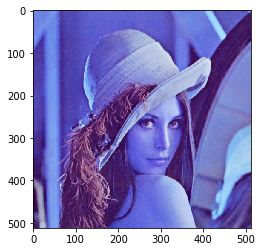

In [7]:
plt.imshow(img)
plt.show()

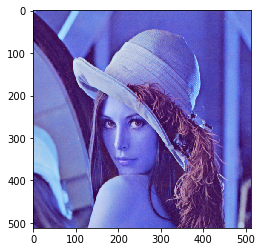

In [10]:
# 水平翻轉 (horizontal)
img_hflip = img[:, ::-1, :]
plt.imshow(img_hflip)
plt.show()

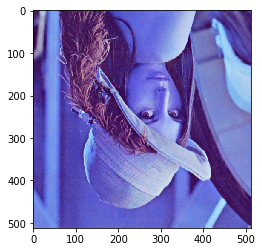

In [11]:
# 垂直翻轉 (vertical)
img_vflip = img[::-1, :, :]
plt.imshow(img_vflip)
plt.show()

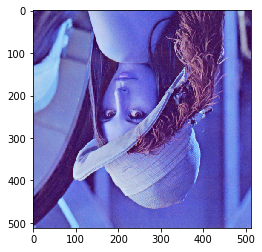

In [12]:
# 水平 + 垂直翻轉
img_hvflip = img[::-1, ::-1, :]
plt.imshow(img_hvflip)
plt.show()

## 縮放圖片

### 放大

我們先透過縮小圖片去壓縮原有圖片保有的資訊，再放大比較不同方法之間的速度與圖片品質

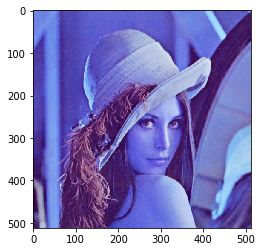

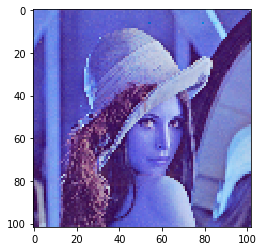

INTER_NEAREST zoom cost 0.0007066726684570312


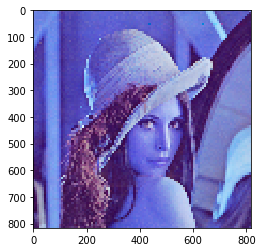

INTER_CUBIC zoom cost 0.0018689632415771484


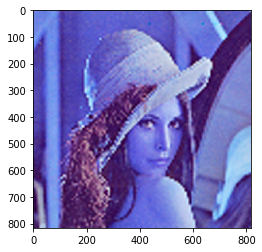

In [14]:
plt.imshow(img)
plt.show()

# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)
plt.imshow(img_test)
plt.show()
# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8
# 鄰近差值 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {}'.format(time.time() - start_time))
plt.imshow(img_area_scale)
plt.show()

# 雙立方差補 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_CUBIC)
print('INTER_CUBIC zoom cost {}'.format(time.time() - start_time))
plt.imshow(img_area_scale)
plt.show()

## 平移幾何轉換

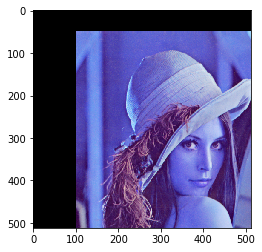

In [15]:
# 設定 translation transformation matrix
# x 平移 50 pixel; y 平移 100 pixel
M = np.array([[1, 0, 100],
              [0, 1, 50]], dtype=np.float32)
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

plt.imshow(shift_img)
plt.show()